# CCEES - Exercise 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%load_ext cython

## L63 System - Basics

In [2]:
%%cython 
def L63(t, u, r=13.926, Pr=10., b=8/3):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = Pr * (u_2 - u_1)
    f_2 = -u_1 * u_3 + r * u_1 - u_2
    f_3 = u_1 * u_2 - b * u_3
    
    return [f_1, f_2, f_3]

In [3]:
def solve_L63(r=13.926, Pr=10., b=8/3, u0=[1,0,0], t_stop=100, t_steps=100_000):
    t_range = np.linspace(0, t_stop, t_steps)
    solution = solve_ivp(lambda t, u: L63(t, u, r, Pr, b), t_span=(0, t_stop), y0=u0, t_eval=t_range)   
    return solution

### a)

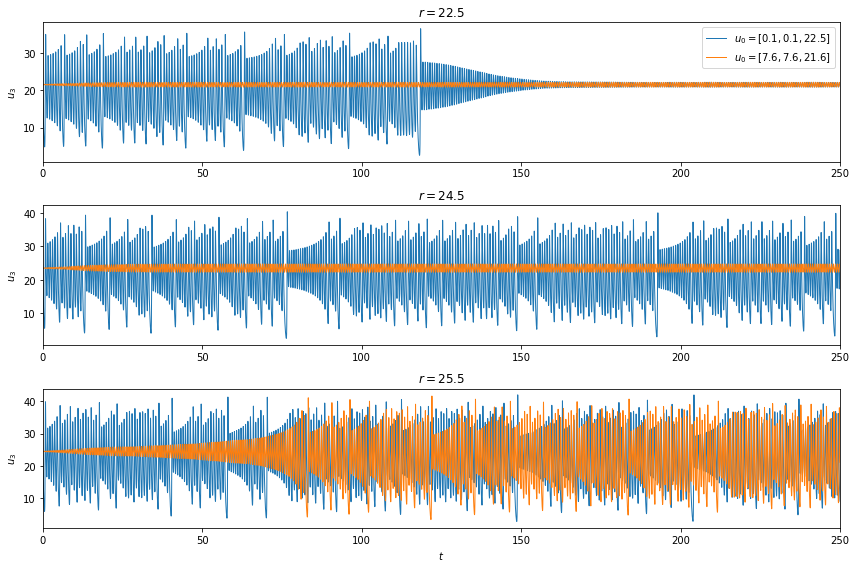

In [6]:
fig = plt.figure()
axs = []

rs = [22.5, 24.5, 25.5]

for i, r in enumerate(rs):
    u_a = [.1, .1, r]
    u_b = [np.sqrt(8/3*(r-1)), np.sqrt(8/3*(r-1)), r - .9]
    sol_a = solve_L63(r=r, u0=u_a, t_stop=250)
    sol_b = solve_L63(r=r, u0=u_b, t_stop=250)
    
    axs.append(plt.subplot2grid((len(rs), 1), (i, 0)))
    
    axs[i].plot(sol_a.t, sol_a.y[2], linewidth=1, label=r'$u_0 = [{:.1f}, {:.1f}, {:.1f}]$'.format(*u_a))
    axs[i].plot(sol_b.t, sol_b.y[2], linewidth=1, label=r'$u_0 = [{:.1f}, {:.1f}, {:.1f}]$'.format(*u_b))
    
    axs[i].set_title(r'$r = {}$'.format(r))
    axs[i].set_xlim(sol_a.t[0], sol_a.t[-1])
    axs[i].set_ylabel(r'$u_3$')
    
    if i == 0:
        axs[i].legend()
    
axs[-1].set_xlabel(r'$t$')
    
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

### b)

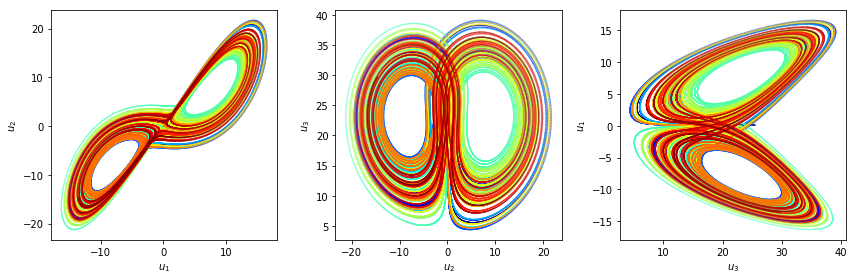

In [7]:
sol = solve_L63(r=24.5, u0=[.1, .1, r], t_stop=100, t_steps=100_000)

indices = [(0, 1), (1, 2), (2, 0)]
cmap = plt.cm.jet(np.linspace(0, 1, len(sol.t)))

fig = plt.figure()
axs = []

for i, j in indices:
    axs.append(plt.subplot2grid((1, len(indices)), (0, i)))
    
    axs[i].scatter(sol.y[i], sol.y[j], s=.1, c=cmap)
    
    axs[i].set_xlabel(r'$u_{}$'.format(i+1))
    axs[i].set_ylabel(r'$u_{}$'.format(j+1))
    
fig.set_size_inches(12, 4)
plt.tight_layout()
plt.show()

### c)

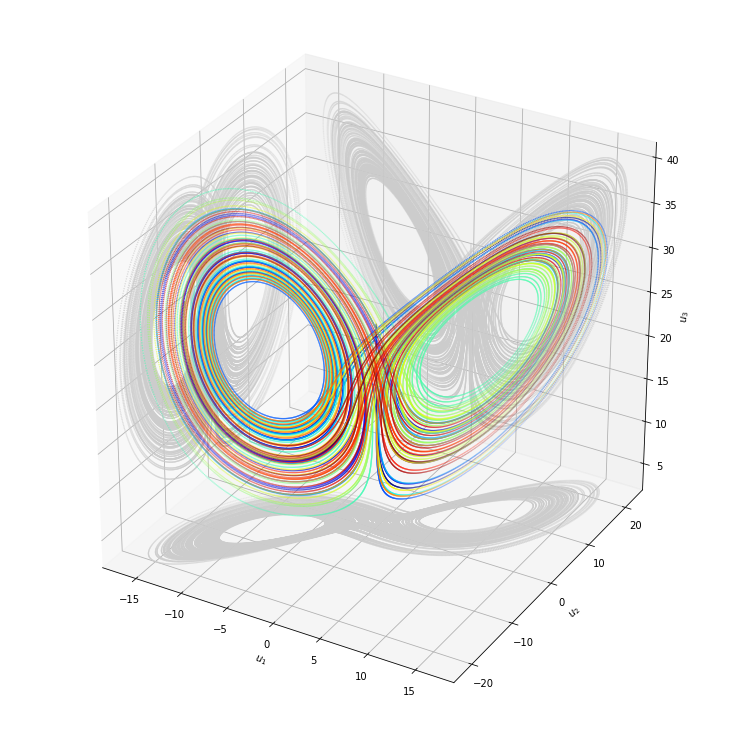

In [8]:
sol = solve_L63(r=24.5, u0=[.1, .1, r], t_stop=100, t_steps=100_000)

cmap = plt.cm.jet(np.linspace(0, 1, len(sol.t)))

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(*sol.y, s=.1, c=cmap, zorder=2)

x_lim, y_lim, z_lim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()

ax.scatter(sol.y[0], sol.y[2], zdir='y', zs=y_lim[1], s=.1, c='.8', zorder=1)
ax.scatter(sol.y[1], sol.y[2], zdir='x', zs=x_lim[0], s=.1, c='.8', zorder=1)
ax.scatter(sol.y[0], sol.y[1], zdir='z', zs=z_lim[0], s=.1, c='.8', zorder=1)

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_zlabel(r'$u_3$')

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

fig.set_size_inches(10, 10)
plt.show()